# Classification

## 1. Introduction
So in our last lesson we went through regression, which is where we fit a function to continuous data (and for now, I want you to think of a function as a line, or a surface that goes through the data points). This week, we're going to go through **classification**.

So remember last week when I mentioned that there are three problems that most AI methods aim to solve? In order, they were:

1. Regression;
2. Classification; and,
3. Clustering.

Well, this week, we're going to cover classification, which is where we have **discrete labeled data** (think of these as separate buckets, and we know the names of each bucket) and we're trying to figure out which bucket some new example belongs to. For example, say we have data on the spending habits of many different people -- a classification task might involve guessing if a person is a guy or a girl based on how they spend their money. This is different to regression, because regression requires that we guess an actual value (e.g. how much money they spend).

As with regression, the goal of classification is that we learn a model that we can use to make predictions, except now, we aren't predicting a value, but a class. For example, say we were selling a product online, and we wanted to know how to spend our money on advertising to generate the most sales. One way to go about it would be to figure out who is buying your product, and target the with advertising. Figuring out who is buying your product is a **classification problem**. Similarly, imagine if we have a bunch of health data, and we want to know if someone has an illness -- again, this would fall into the realm of classification.

So what does classification look like? What problem are we actually solving? I think a good intuition for that is to imagine something like this:

![img](https://paperswithcode.com/media/thumbnails/task/task-0000001592-811f0118_3TU7fCb.jpg)

So what are we looking at here? We have two separate groups (Class A and Class B), and we have a line separating them. This line is called the **decision boundary** -- it's the line where the probability of being from Class A or Class B is 50% (i.e. it could be either). Above this line, we know that the probability of being in class A is higher. Below this line, the probability of being in Class B is higher. The decision boundary isn't always so clear cut, for example:

![img2](https://sebastianraschka.com/images/blog/2014/intro_supervised_learning/classify_example.png)

We can see that sometimes we get examples of classes on the wrong side of the decision boundary. Rather it tells us that **on average** examples on one side of the boundary will belong to a given class. When we mis-classify classes, if we are looking at two classes, we call these **false positives** and **false negatives**. 

So how do we do this? We'll go through that next.

## 2. Logistic Regression
You'll notice that the title of this section includes regression, and that's because what we're doing is largely the same as what we did for regression. That is, we need the same four components:

1. A dataset;
2. A function that we can fit to the data by finding the right **parameters**;
3. A cost function; and,
4. An optimizer. 

As with last week, we won't worry about the last two components too much, since they will be taken care of for us in most ML libraries. Instead, we need to focus on the first two -- having a dataset, and having a function that we can learn the parameters of.

So let's think about the dataset; we want a set of features -- the same as with regression -- but our target is no longer a continuous value. Rather, our target is a class (e.g. "yes" or "no", "male" or "female", or, for a more complex example, "cat" or "dog" or "pig").That is, we say that our target is a **label**, where the label is the name of the class. Our job is to predict this label!

In the case where we have two labels, we can always reframe this as a "yes" or "no" question, which is **binary classification**. When we have more than two classes, we would call this **multi-class classification**. For the purposes of this notebook, and for the second part of Assignment 1, we'll be focusing on binary classification only.

Okay, so what about the function, then? Let's think about it; say we have two classes, then we could have a function that outputs a single value between 0 and 1. If the value is $\geq 0.5$, we could say that our function is predicting class A. Similarly, if it's $< 0.5$, we could say that it's predicting class B. We can extend this to any number of classes (say, A, B and C) by reformulating the problem as A vs B and C, B vs A and C, or C vs A and B. This is **logistic regression**.

So what function can we use that has this property? That is, we can feed it a bunch of inputs, and it will always output a value between 0 and 1? The one we use is called the **logit** or **sigmoid function**:

$$f(z) = \frac{1}{1 + e^{-z}}$$

Where $z$ is our input (we'll define this in a bit), and $e$ is Euler's number. Let's graph this function to see what it looks like:

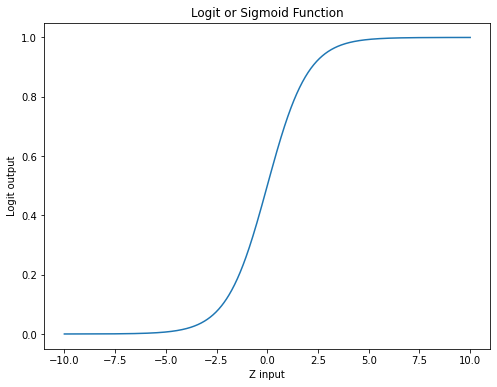

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda z : 1/(1+np.exp(-z))

zs = np.linspace(-10, 10, 1000)
outputs = sigmoid(zs)

plt.figure(figsize=(8,6))
plt.plot(zs, outputs)
plt.title("Logit or Sigmoid Function")
plt.xlabel("Z input")
plt.ylabel("Logit output")
plt.show()

As we can see, this function always takes a value between 0 and 1. As $z \rightarrow -\infty$, $f(z) \rightarrow 0$. Similarly, as $z \rightarrow \infty$, $f(z) \rightarrow 1$. That is, we can think of this function as **squashing all of our input values** to the interval $(0, 1)$.

Okay, so how do we use this with our features? Well, we can extend the same ideas that we used for regression to classification; that is, we let:

$$z = \alpha + \beta X$$

In the case where we only have one feature, and:

$$z = \alpha + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n$$

When we have multiple features. Similar to regression, our goal is to find the parameters $\alpha$ and $\beta$ that let our function output $f(z) \geq 0.5$ for our target labels. A good way to think of this is that we're doing **the same thing as we did with linear regression, except now, we're passing the output through a squashing function so that it's between 0 and 1**.

## 3. An Example with Dummy Data

Let's generate some dummy data -- here, we'll have two separate clusters that we'll call A and B, and we want to train a classifier to distinguish between them. The features will be the values of X and Y.

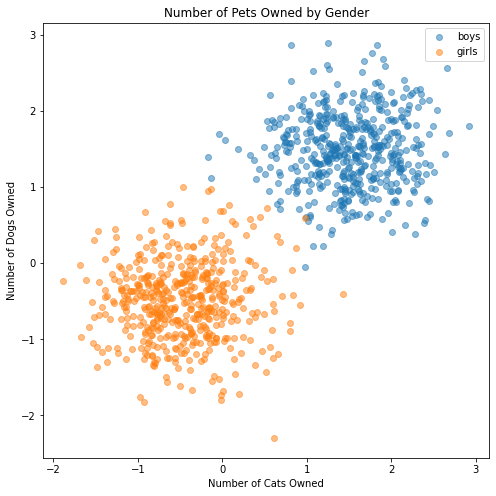

In [ ]:
import random

mux_1, stdx_1 = 1.5, 0.5
muy_1, stdy_1 = 1.5, 0.5

mux_2, stdx_2 = -0.5, 0.5
muy_2, stdy_2 = -0.5, 0.5

samples = 500

# cluster 1
x_1 = np.array([random.gauss(mux_1, stdx_1) for _ in range(samples)])
y_1 = np.array([random.gauss(muy_1, stdy_1) for _ in range(samples)])

# cluster 2
x_2 = np.array([random.gauss(mux_2, stdx_2) for _ in range(samples)])
y_2 = np.array([random.gauss(muy_2, stdy_2) for _ in range(samples)])

# plot our clusters
plt.figure(figsize=(8,8))
plt.scatter(x_1, y_1, alpha=0.5)
plt.scatter(x_2, y_2, alpha=0.5)
plt.title("Number of Pets Owned by Gender")
plt.xlabel("Number of Cats Owned")
plt.ylabel("Number of Dogs Owned")
plt.legend(["boys", "girls"])
plt.show()

Now that we have some data, let's create our features (the **$x$** and **$y$** locations of the two clusters:

In [ ]:
# combine into a set of features
features = np.hstack([np.vstack([np.ones(x_1.shape), x_1, y_1]),            # xy of A
                      np.vstack([np.ones(x_2.shape), x_2, y_2])])           # xy of B

# combine into a set of labels
labels = np.hstack([np.ones(x_1.shape), np.zeros(x_2.shape)]).reshape(1, -1)

print(features.shape)
print(labels.shape)

(3, 1000)
(1, 1000)


So this looks a bit confusing, so let's tie it back to our regression example. In regression, we learn parameters for a function $f(.) = \alpha + \beta_1 x_1 + ... + \beta_n x_n$. Let's re-frame this as being:

$$f(\theta) = \Theta^TX$$

Where $\theta$ is a **vector** of parameters. That is:

$$\Theta =\begin{bmatrix}
        \theta_0 & \theta_1 & ... & \theta_n
\end{bmatrix}^T$$

And $X$ is a **vector** of feature values (i.e. the $x$ and $y$ locations of each point in this case, or the values of LSTAT and RM in our regression example last week). This looks like:

$$X =\begin{bmatrix}
        1 & x_1 & ... & x_n
\end{bmatrix}^T$$

Multiplying this out gives us $\theta_0 + \theta_1 x_1 + ... + \theta_n x_n$, where the $\theta_0$ is there to take the place of $\alpha$ in our original equation.

In the below cell, I'll define a **cost function** (again, don't worry too much about this), and find the parameters $\theta$ that minimize this cost using an **optimization method** (an algorithm for finding the inputs that give the minimum value of a cost function).

In [ ]:
from scipy.optimize import minimize

def cost(theta, x, y):
    """
    Our cost function -- don't worry about this for now -- this is generally 
    given to us by the problem. E.g. for regression, we use MSE. For sigmoid 
    classification, we use Binary Cross Entropy (the loss function here).
    """
    h = sigmoid(theta.reshape(1, -1).dot(x))
    loss = (-y*np.log(h)-(1-y)*np.log(1-h)).mean()
    return loss

# here is where I call a minimize function
theta_0 = np.random.randn(1,3)
theta = minimize(cost, theta_0, args=(features, labels), method="CG", tol=1e-3)
print("Found weight parameters: {}".format(theta.x))

test_pred = sigmoid(np.array(theta.x).reshape(1,-1).dot(features))
test_pred = (test_pred >= 0.5)*1

print("Predictions")
print(test_pred[:,:5])
print()
print("Labels")
print(labels[:, :5])
print()
print("Classifier accuracy: {:.5f}".format((pred == labels).mean()))

Found weight parameters: [-5.79608845  5.05310527  6.25165454]
Predictions
[[1 1 1 1 1]]

Labels
[[1. 1. 1. 1. 1.]]

Classifier accuracy: 0.99600


So here, we can see that our classifier has found a number of weights, and has an accuracy of 99.7% on the training data (this is a toy problem, so that's to be expected -- normally you would be suspicious of such a high accuracy). In effect, what we've done is a form of **multilinear regression**, since we have two features -- $x$ and $y$, and we've used them to fit a function that chooses between 1 and 0 (as opposed to linear regression, where we choose a value).

Now that that's done, let's visualize what's happening:

Predicted label is:  [[0.99999219]]


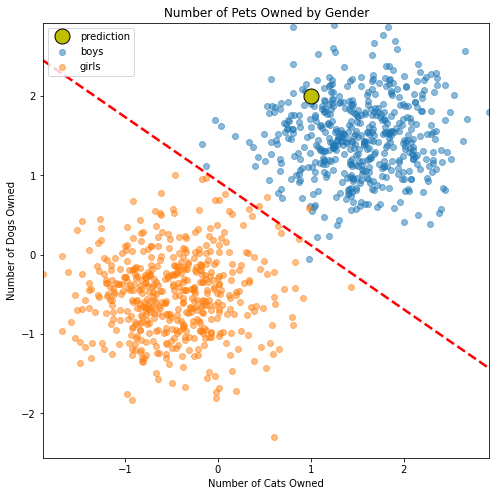

In [ ]:
min_x_val = min(x_1.min(), x_2.min())
max_x_val = max(x_1.max(), x_2.max())

min_y_val = min(x_1.min(), x_2.min())
max_y_val = max(x_1.max(), x_2.max())

x_, y_ = np.meshgrid(np.linspace(min_x_val, max_x_val, 50), np.linspace(min_y_val, max_y_val, 50))

u = np.linspace(min_x_val, max_x_val, 50)
data = []
for i in range(50):
    v = y_[i,:]
    xs = np.array([np.ones(u.shape), u, v])
    p = sigmoid(np.array(theta.x).reshape(1,-1).dot(xs))
    data.append(p[0,:])
data = np.vstack(data)

thetas = np.array(theta.x).reshape(-1,1)
new_data = np.array([1, 1, 2]).reshape(-1, 1)             # [1, x, y]
new_pred = sigmoid(thetas.T.dot(new_data))
print("Predicted label is: ", new_pred)

plt.figure(figsize=(8,8))
plt.scatter(x_1, y_1, alpha=0.5)
plt.scatter(x_2, y_2, alpha=0.5)
plt.contour(x_, y_, data, [0.5], linewidths=2.5, linestyles="dashed", colors="r")
plt.plot(new_data[1,:], new_data[2,:], "yo", markersize=15, markeredgecolor="k")
plt.title("Number of Pets Owned by Gender")
plt.xlabel("Number of Cats Owned")
plt.ylabel("Number of Dogs Owned")
plt.legend(["prediction", "boys", "girls"])
plt.show()

As we can see, we get a line that splits the data roughly down the middle. This is the **decision boundary** that separates the two clusters. We can see that for this toy example, our model predicts that above this line, we could predict that a person who owns 1 cat and 2 dogs is probably a boy. Likewise, someone who owns no cats or dogs is most likely a girl.

### 3.1 Linear Separability
One potential hiccup to be aware of is the potential for data that isn't linearly separable. For example, consider the following data:

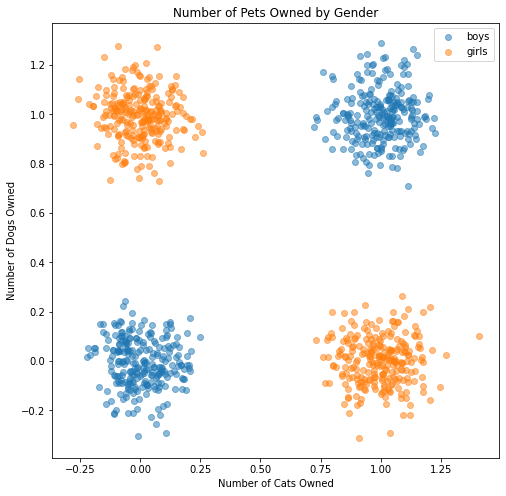

In [ ]:
samples = 250

x_1 = np.array([random.gauss(0, 0.1) for _ in range(samples)])
y_1 = np.array([random.gauss(0, 0.1) for _ in range(samples)])

x_2 = np.array([random.gauss(1, 0.1) for _ in range(samples)])
y_2 = np.array([random.gauss(0, 0.1) for _ in range(samples)])

x_3 = np.array([random.gauss(0, 0.1) for _ in range(samples)])
y_3 = np.array([random.gauss(1, 0.1) for _ in range(samples)])

x_4 = np.array([random.gauss(1, 0.1) for _ in range(samples)])
y_4 = np.array([random.gauss(1, 0.1) for _ in range(samples)])

x1, y1 = np.hstack([x_1, x_4]), np.hstack([y_1, y_4])
x2, y2 = np.hstack([x_2, x_3]), np.hstack([y_2, y_3])

plt.figure(figsize=(8,8))
plt.scatter(x1, y1, alpha=0.5)
plt.scatter(x2, y2, alpha=0.5)
plt.title("Number of Pets Owned by Gender")
plt.xlabel("Number of Cats Owned")
plt.ylabel("Number of Dogs Owned")
plt.legend(["boys", "girls"])
plt.show()

Can't be linearly separated. That is, **there is no straight line that can be drawn so that all orange labels are on one side, and all blue labels are on the other**. We would need to draw a minimum of two lines to separate this dataset. The way we would typically handle this type of problem is with a **nonlinear function approximator** (i.e. something like a neural net, or an SVM).

## 4. Using SKLearn and Real Data
As I mentioned earlier, we won't worry too much about the cost function and optimizer -- instead, we'll work with SKLearn, where these are implemented for us. For this task, we will use the Pima Indian's Diabetes dataset, which you can find on Canvas under this week's course materials. Note that this task is **very similar to what you will be doing for the second part of assignment 1.**

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now, we'll load the dataset:

In [ ]:
dta_diabetes = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/diabetes.csv')
#view first 5 rows
dta_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Most of these are pretty self-explanatory here, so I won't put a table together this week. The pedigree function is just a function that predicts the likelihood of diabetes given a family history. Let's do what we did last week, and do a quick visualization of the data. **It doesn't normally make sense to do correlation between continuous and binary data like this**, so we'll just try a quick eyeball test to see how things look:


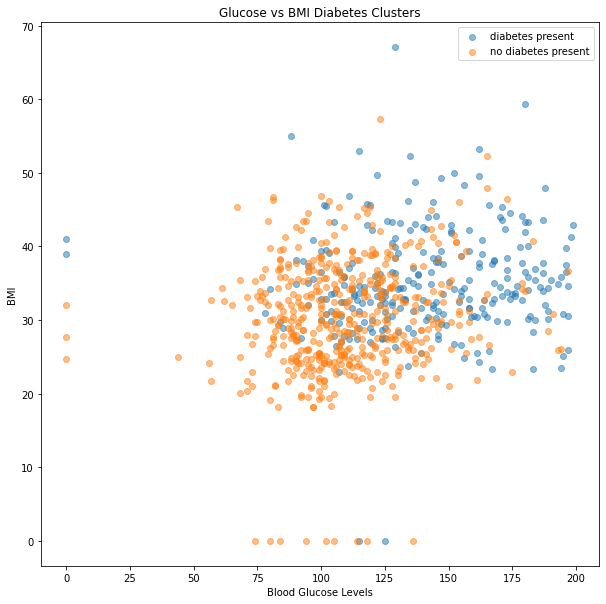

In [ ]:
mat_1 = dta_diabetes[dta_diabetes["Outcome"] == 1]
mat_2 = dta_diabetes[dta_diabetes["Outcome"] == 0]
plt.figure(figsize=(10,10))
plt.scatter(mat_1["Glucose"], mat_1["BMI"], alpha=0.5)
plt.scatter(mat_2["Glucose"], mat_2["BMI"], alpha=0.5)
plt.title("Glucose vs BMI Diabetes Clusters")
plt.xlabel("Blood Glucose Levels")
plt.ylabel("BMI")
plt.legend(["diabetes present", "no diabetes present"])
plt.show()

So as we would expect, we can see that there are indeed two reasonably distinct clusterings here, for blood glucose and BMI. That said, there's a fair bit of overlap between the groups, but hopefully a multilinear classifier will still give us a decent fit.

Next, we'll slice the features that we're going to use to predice whether or not a person has diabetes:

In [ ]:
predictors = ["Pregnancies", 
              "Glucose", 
              "BloodPressure", 
              "SkinThickness", 
              "Insulin", 
              "BMI", 
              "DiabetesPedigreeFunction",
              "Age"]
features = dta_diabetes[predictors] 
target = dta_diabetes["Outcome"]

Now to set up our train-test-split, the same as we did last week. Remember, the purpose of this is to separate a small portion of the data so that we can test on it, which helps us avoid overfitting to the training data:

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(features,target, test_size=0.25,
random_state=0)

And now we'll fit the data. To do this, we'll use the **LogisticRegression** model in SKLearn. As with the linear regression model we used last week, we call the .fit() function to train it. I'll bump up the number of iterations, because the default (100) can sometimes not converge on this dataset (that is, it needs to take a few more steps in order to find the parameters that give us the lowest cost).

In [ ]:
#import the logistic regression model
from sklearn.linear_model import LogisticRegression

#model instantiation
diabetes1 = LogisticRegression(max_iter=1000)

#fitting the model
diabetes1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now that it's trained, let's it and see how accurate it is using the test data:

In [ ]:
#make predictions
pred1 = diabetes1.predict(X_test)
print("Classifier Accuracy is:")
print((pred1 == y_test).sum()/len(y_test))
print()

Classifier Accuracy is:
0.8020833333333334



That's not bad! We would expect 50% accuracy if the classifier took random guesses (since we have two classes), but we're getting around 80%. Next, we'll look at our confusion matrix.

### 4.1 Confusion Matrix

Now that we've done that, let's generate a confusion matrix so that we can calculate a performance metrics. First up, the matrix:

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred1) 

print(cnf_matrix)

[[118  12]
 [ 26  36]]


Now that we have that, let's use it to generate a heatmap that gives us our values:

Text(0.5, 257.44, 'Actual')

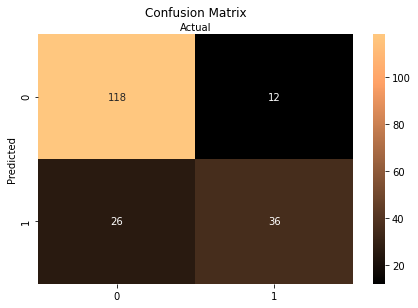

In [ ]:
#create heatmaps
# import required modules import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

#store class names in array
cls_name = [1,0]

#create subplots
fig, ax = plt.subplots()
#setting tick marks
t_marks = np.arange(len(cls_name)) 
plt.xticks(t_marks,cls_name) 
plt.yticks(t_marks,cls_name)

#creating heatmaps
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="copper", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1) 
plt.ylabel("Predicted") 
plt.xlabel("Actual")

So what does this tell us? It tells us that we have 118 **true positives** and 36 **true negatives**. Interestingly, the classifier predicts **false positives** more than twice as oftens as **false negatives**. We can use these to calculate our precision, recall, accuracy, sensitivity, specificity, etc.

**Why do we need these other metrics?**

Imagine we have a case where we're trying to predict a rare disease, such that of 1000 people we test, only one person will have it. If our classifier always predicts "negative" on this data, it will be correct 999 out of 1000 times. As a result, it's important to measure the rate of true positives, true negatives, false positives, and false negatives, so we can tell if our classifier is actually producing a useful prediction.

## 5. Neural Network Classifiers
Okay, so I'm going to expand on some of the stuff I showed you last week, and demonstrate how we can use neural nets for classification. It's exactly the same as when we use the sigmoid function, except now we have a neural network as our parameters, rather than a linear combination of features. That is:

$$g(\theta) = 1/(1+e^{-f(\theta)})$$ 

Where $g(\theta)$ is a prediction value output by the network (i.e. a number in [0, 1] for two classes), and $f(\theta)$ is the raw output of our neural network. This sounds complicated, but it's actually pretty straightforward. First, I'll import the dataset and then split it into train and test sets:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

batch_size = 256
test_batch_size = 4

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_loader = torch.utils.data.DataLoader(
                datasets.MNIST('../data', train=True, download=True, transform=transform),
                batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
                datasets.MNIST('../data', train=False, transform=transform),
                batch_size=test_batch_size, shuffle=True)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Now that that's done, I'll visualize a few examples of numbers to make sure there's nothing wrong with the dataset or how we've loaded it:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


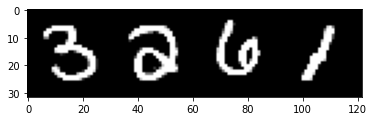

Given labels are:  [3 2 6 1]


In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
print("Given labels are: ", labels.numpy())

Okay, that looks good! Each image is a 28x28 pixel image, so that gives us a total of 784 neurons. We'll define the network below:

In [ ]:
input_dim = 784
hidden_dim = 128
output_dim = 10

# using sequential to define the network
softmax_classifier = nn.Sequential(
                    nn.Linear(input_dim, hidden_dim),
                    nn.ReLU(),
                    nn.Linear(hidden_dim, output_dim),
                    nn.LogSoftmax(dim=-1))              # we are using a softmax classifier here

I've done something a bit different here and used the **softmax** output -- we'll go into this more in-depth next week. For now, you only need to know that it's a more convenient way of dealing with multiple classes (i.e. more than 2). Finally, I'll write a quick training loop and plotting function:

In [ ]:
from IPython.display import clear_output

def plot(iteration, loss):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title("Iter %s. loss: %s" % (iteration[-1], loss[-1]))
    plt.plot(iteration, loss)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

def train(model, optimizer, loss_function, dataset, iters=10, log_freq=1):
    model.train()
    ep, cost = [], []
    for i in range(1, iters+1):
        mean_loss = 0.
        for j, (data, target) in enumerate(dataset):
            data = data.squeeze(dim=1)
            pred_ys = model(data.view(data.size(0),-1))
            loss = loss_function(pred_ys, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            mean_loss = (mean_loss*j+loss.item())/(j+1)
        if i % log_freq == log_freq-1:
            ep.append(i)
            cost.append(mean_loss)
            plot(ep, cost)
            
def test(model, dataset):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in dataset:
            data = data.squeeze(dim=1)
            output = model(data.view(data.size(0),-1))
            test_loss += F.nll_loss(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

And now to train it:

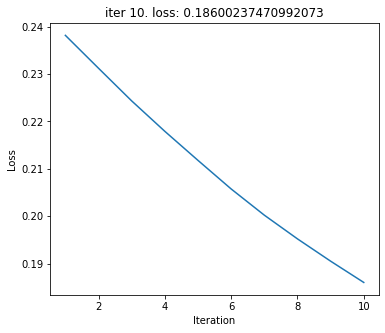


Test set: Average loss: 0.0466, Accuracy: 9475/10000 (95%)



In [ ]:
optimizer_softmax = optim.SGD(softmax_classifier.parameters(), lr=1e-3, momentum=0.9)
train(softmax_classifier, optimizer_softmax, F.nll_loss, train_loader)
test(softmax_classifier, test_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


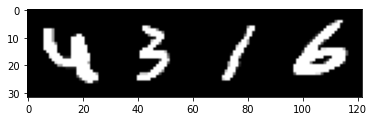

Predicted labels are:  [4 3 1 6]


In [ ]:
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
images.squeeze(dim=1)
_, output = torch.max(softmax_classifier(images.view(images.size(0),-1)), dim=1)
print("Predicted labels are: ", output.numpy())

As we can see, we've fit a classifier that learns to predict handwritten digits correctly! This breaks down for larger images (we already have 784 input neurons for these small images), so in those cases, we use an architecture called a Convolutional Neural Network that scales better. You can think of these networks as breaking a bigger image up into smaller chunks, and searching through it for important features (e.g. noses, hair, eyes). The network doesn't initially know any features, but it learns them through training.


## Exercises

In [12]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

X, y = load_breast_cancer(return_X_y=True)
features = pd.DataFrame(data=X, columns=["radius_mean", 
                              "texture_mean", 
                              "perimeter_mean", 
                              "area_mean", 
                              "smoothness_mean", 
                              "compactness_mean", 
                              "concavity_mean", 
                              "concave_points_mean", 
                              "symmetry_mean", 
                              "fractal_dimension_mean",
                              "radius_se",
                              "texture_se",
                              "perimeter_se",
                              "area_se",
                              "smoothness_se",
                              "compactness_se",
                              "concavity_se",
                              "concave_points_se",
                              "symmetry_se",
                              "fractal_dimension_se",
                              "radius_worst", 
                              "texture_worst", 
                              "perimeter_worst", 
                              "area_worst", 
                              "smoothness_worst", 
                              "compactness_worst", 
                              "concavity_worst", 
                              "concave_points_worst", 
                              "symmetry_worst", 
                              "fractal_dimension_worst"] )

features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
target = pd.DataFrame(y, columns=["diagnosis"])
target.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


1. Split your data into a training set and a test set (1 point)

In [14]:
from sklearn.model_selection import train_test_split


X_train,X_test, y_train, y_test = train_test_split(features,target, test_size=0.25,
random_state=0)

2. Split the data into two dataframes -- one with all features where the target is 1, and another with all features where the target is 0 (2 points)

In [16]:
dta_1 = features[target["diagnosis"] == 1]
dta_2 = features[target["diagnosis"] == 0]


3. Select two features. Plot a scatter plot of all positive and negative cases using the two dataframes you created above, with your features of interest on the x and y axes (2 points)

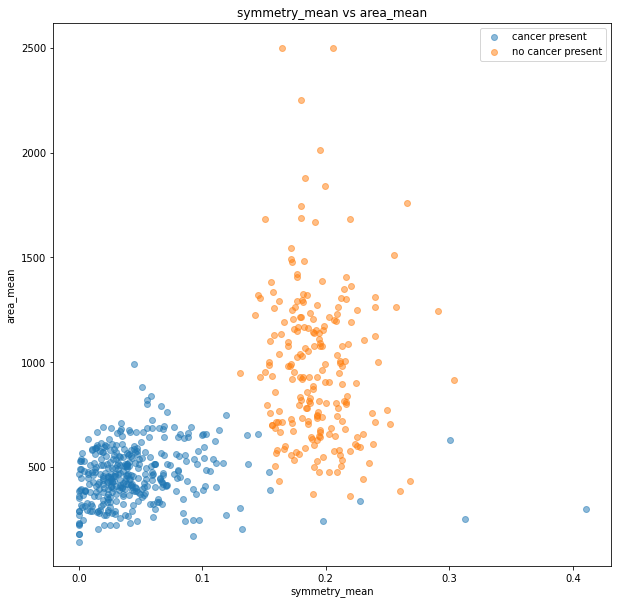

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(dta_1["concavity_mean"], dta_1["area_mean"], alpha=0.5)
plt.scatter(dta_2["symmetry_mean"], dta_2["area_mean"], alpha=0.5)
plt.title("symmetry_mean vs area_mean")
plt.xlabel("symmetry_mean")
plt.ylabel("area_mean")
plt.legend(["cancer present", "no cancer present"])
plt.show()

4. Select 5 features, and use them to train a classifier using SKLearn (see the above examples for reference). (3 points)

In [22]:
predictors = ["radius_mean", 
"texture_mean", 
"perimeter_mean", 
"area_mean", 
"smoothness_mean"]

features_test = features[predictors]
target_test = target["diagnosis"]



In [21]:

X_train,X_test, y_train, y_test = train_test_split(features,target, test_size=0.25,
random_state=0)

In [23]:


#import the logistic regression model
from sklearn.linear_model import LogisticRegression

#model instantiation
features_test = LogisticRegression(max_iter=10000)

#fitting the model

features_test.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

5. Calculate the accuracy of your classifier using:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

You can refer to code in this notebook for an example. (2 points)

In [25]:
#make predictions
from sklearn import metrics


pred = features_test.predict(X_test)
print("Classifier Accuracy is:")
print((pred == y_test.squeeze()).sum()/len(y_test.squeeze()))
print()

cnf_matrix = metrics.confusion_matrix(y_test, pred) 

print(cnf_matrix)

Classifier Accuracy is:
0.951048951048951

[[52  1]
 [ 6 84]]
